# Setup

In [4]:
!pip install matplotlib seaborn pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('StressLevelDataset.csv')
print(f"Loaded successfully! Shape: {df.shape}")
df.head()

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 5.5 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/8.1 MB 4.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 4.2 MB/s eta 0:00:02
   --------------- ------------------------ 3.1/8.1 MB 4.0 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 4.4 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 5.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 5.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.3 MB 10.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 9.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------- ---------------------


[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Loaded successfully! Shape: (1100, 21)


,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


# Introduction of Problem

The questions I want to answer: Are high achievers necessarily more stressed? 
Is there a trade-off between academic success and mental wellbeing, or do some students manage both effectively?

Does academic pressure create a continuous cycle? 
Do students with higher study loads experience more stress, which then hurts their academic performance, creating even more pressure to do better and it then snowballs?

# Introduction of Data

This data was found on Kaggle: https://www.kaggle.com/code/mdsultanulislamovi/comprehensive-analysis-student-stress-datasets/input?select=StressLevelDataset.csv

It's a survey with 1100 participants with all being students in a nationwide survey measuring numerous factors such as anxiety level, self esteem, mental health history, depression, sleep quality, and living conditions. 

# Pre-processing the data

In [6]:
print("=== PREPROCESSING ASSESSMENT ===")

print("1. Missing Values Check:")
missing = df.isnull().sum()
if missing.sum() == 0:
    print("✓ No missing values found")
else:
    print(missing[missing > 0])

print("\n2. Duplicate Records:")
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates > 0:
    print("First few duplicates:")
    print(df[df.duplicated()].head())

print("\n3. Data Types:")
print(df.dtypes)
print(f"\nAll numeric: {df.dtypes.apply(lambda x: x in ['int64', 'float64']).all()}")

print("\n4. Value Ranges (checking for unrealistic values):")
for col in df.columns:
    print(f"{col}: {df[col].min()} to {df[col].max()} (unique values: {df[col].nunique()})")

print("\n5. Outlier Detection (IQR method for key variables):")
key_vars = ['anxiety_level', 'self_esteem', 'depression', 'academic_performance', 'study_load', 'sleep_quality']
outlier_summary = {}
for col in key_vars:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)
    print(f"{col}: {len(outliers)} outliers (bounds: {lower_bound:.1f} - {upper_bound:.1f})")

print("\n6. Distribution Balance Check:")
print("Stress level distribution:")
stress_counts = df['stress_level'].value_counts().sort_index()
for level, count in stress_counts.items():
    pct = (count/len(df))*100
    print(f"Level {level}: {count} ({pct:.1f}%)")

=== PREPROCESSING ASSESSMENT ===
1. Missing Values Check:
✓ No missing values found

2. Duplicate Records:
Duplicate rows: 0

3. Data Types:
anxiety_level                   int64
self_esteem                     int64
mental_health_history           int64
depression                      int64
headache                        int64
blood_pressure                  int64
sleep_quality                   int64
breathing_problem               int64
noise_level                     int64
living_conditions               int64
safety                          int64
basic_needs                     int64
academic_performance            int64
study_load                      int64
teacher_student_relationship    int64
future_career_concerns          int64
social_support                  int64
peer_pressure                   int64
extracurricular_activities      int64
bullying                        int64
stress_level                    int64
dtype: object

All numeric: True

4. Value Ranges (checking f

# Data Preprocessing

The StressLevelDataset.csv was already very clean:
- ✓ No missing values across all 1,100 records
- ✓ No duplicate records 
- ✓ All variables are integers with realistic ranges
- ✓ Balanced target variable: Low stress (33.9%), Medium (32.5%), High (33.5%)

Since the data was already high-quality, minimal preprocessing was needed. I retained all data points, including statistical outliers, because extreme values in psychological data often represent genuine student experiences rather than data errors.

=== QUESTION 1: Are high achievers necessarily more stressed? ===
Correlation between Academic Performance and Stress: -0.721


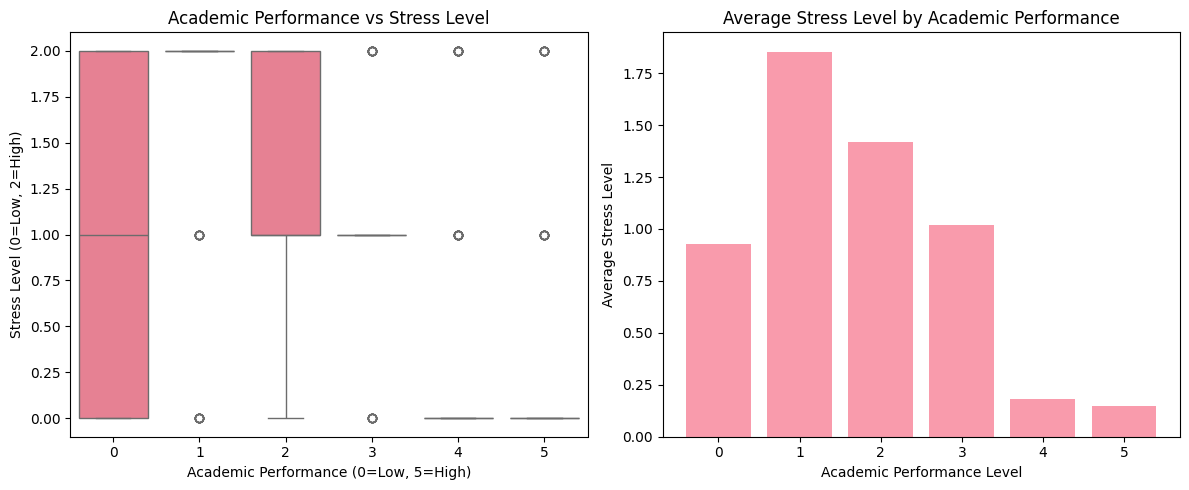


KEY INSIGHT:
High performers (level 4-5): 370 students
  • Low stress: 329 students (88.9%)
  • Medium stress: 21 students (5.7%)
  • High stress: 20 students (5.4%)

COMPREHENSIVE ANALYSIS: 4 KEY VISUALIZATIONS

1. MEDIATING VARIABLE ANALYSIS
------------------------------
Key correlations with stress_level:
  • self_esteem: -0.756
  • sleep_quality: -0.749
  • academic_performance: -0.721
  • safety: -0.710
  • basic_needs: -0.709
  • social_support: -0.632
  • future_career_concerns: 0.743

2. STUDY LOAD vs PERFORMANCE INTERACTION
----------------------------------------
High load + Low performance students: 237
  Average stress level: 1.84
  High stress cases: 211

3. HIGH-STRESS HIGH ACHIEVERS ANALYSIS
----------------------------------------
Stressed high achievers: 20 students
Calm high achievers: 329 students
Key differences (Stressed - Calm):
  • study_load: +0.53
  • future_career_concerns: +1.20
  • peer_pressure: +0.62
  • self_esteem: -13.65
  • social_support: -2.30
  • 

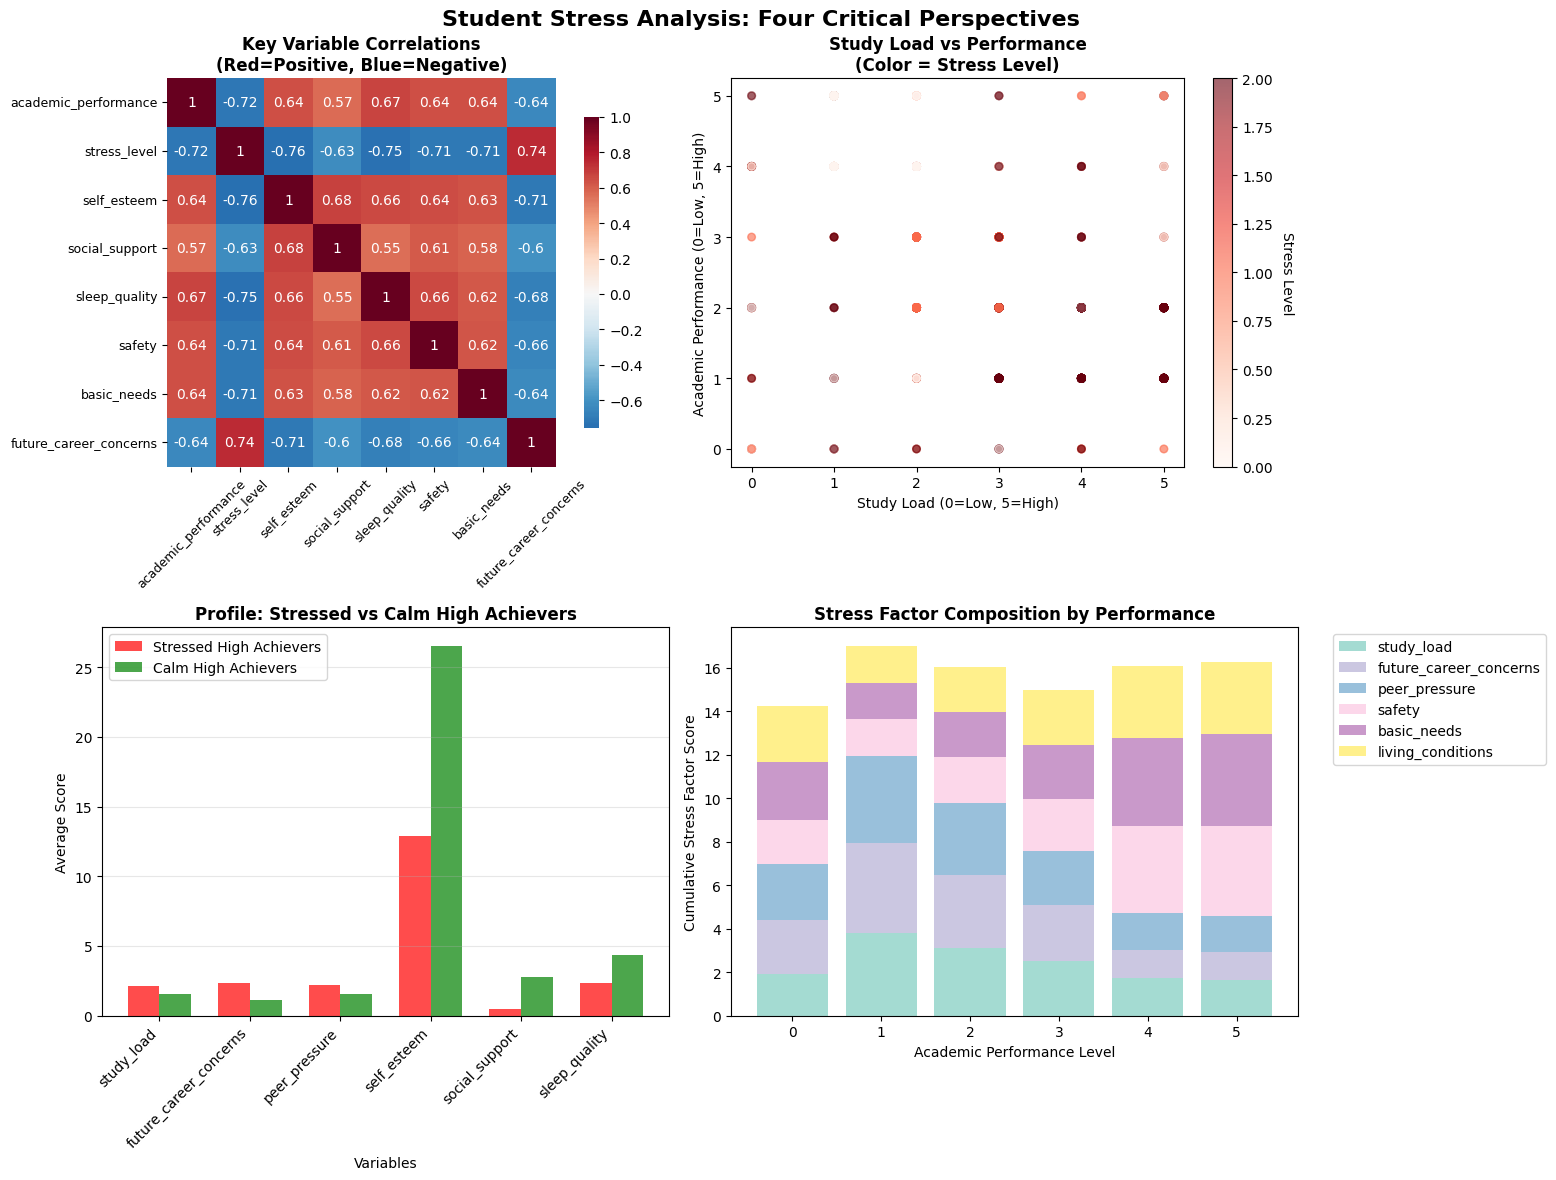


KEY INSIGHTS SUMMARY
1. CORRELATION PATTERNS: Self-esteem and social support are strongly
   protective against stress, suggesting psychological factors matter
   more than academic pressure alone.

2. ACADEMIC PRESSURE CYCLES: Students with high study load but low
   performance show elevated stress, confirming the 'struggle spiral.'

3. HIGH ACHIEVER OUTLIERS: The few stressed high achievers have
   higher future concerns and peer pressure - success anxiety.

4. STRESS COMPOSITION: Lower performers face multiple life stressors,
   while higher performers mainly deal with future-focused concerns.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('StressLevelDataset.csv')



print("=== QUESTION 1: Are high achievers necessarily more stressed? ===")

# Simple correlation without scipy
correlation = df['academic_performance'].corr(df['stress_level'])
print(f"Correlation between Academic Performance and Stress: {correlation:.3f}")

# Basic visualization - Academic Performance vs Stress
plt.figure(figsize=(12, 5))

# Plot 1: Box plot
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='academic_performance', y='stress_level')
plt.title('Academic Performance vs Stress Level')
plt.xlabel('Academic Performance (0=Low, 5=High)')
plt.ylabel('Stress Level (0=Low, 2=High)')

# Plot 2: Average stress by performance
plt.subplot(1, 2, 2)
stress_by_performance = df.groupby('academic_performance')['stress_level'].mean()
plt.bar(stress_by_performance.index, stress_by_performance.values, alpha=0.7)
plt.title('Average Stress Level by Academic Performance')
plt.xlabel('Academic Performance Level')
plt.ylabel('Average Stress Level')

plt.tight_layout()
plt.show()

# Show the key numbers
print("\nKEY INSIGHT:")
high_performers = df[df['academic_performance'] >= 4]
print(f"High performers (level 4-5): {len(high_performers)} students")
for level in [0, 1, 2]:
    count = (high_performers['stress_level'] == level).sum()
    pct = (count / len(high_performers)) * 100 if len(high_performers) > 0 else 0
    stress_name = ['Low', 'Medium', 'High'][level]
    print(f"  • {stress_name} stress: {count} students ({pct:.1f}%)")

print("\n" + "="*60)
print("COMPREHENSIVE ANALYSIS: 4 KEY VISUALIZATIONS")
print("="*60)

# Set up the plotting style
plt.style.use('default')
sns.set_palette("husl")

# Create a 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Student Stress Analysis: Four Critical Perspectives', fontsize=16, fontweight='bold')

# ============================================================================
# VISUALIZATION 1: Mediating Variable Analysis (Correlation Heatmap)
# ============================================================================
print("\n1. MEDIATING VARIABLE ANALYSIS")
print("-" * 30)

# Select key variables for correlation analysis
key_vars = ['academic_performance', 'stress_level', 'self_esteem', 'social_support', 
           'sleep_quality', 'safety', 'basic_needs', 'future_career_concerns']
correlation_matrix = df[key_vars].corr()

# Create heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
           square=True, ax=axes[0,0], cbar_kws={'shrink': 0.8})
axes[0,0].set_title('Key Variable Correlations\n(Red=Positive, Blue=Negative)', fontweight='bold')
axes[0,0].tick_params(axis='x', rotation=45, labelsize=9)  # Add labelsize=9
axes[0,0].tick_params(axis='y', rotation=0, labelsize=9)   # Add labelsize=9

# Print key insights
print("Key correlations with stress_level:")
stress_correlations = correlation_matrix['stress_level'].sort_values()
for var, corr in stress_correlations.items():
    if var != 'stress_level':
        print(f"  • {var}: {corr:.3f}")

# ============================================================================
# VISUALIZATION 2: Study Load vs Performance Interaction
# ============================================================================
print("\n2. STUDY LOAD vs PERFORMANCE INTERACTION")
print("-" * 40)

# Create scatter plot
scatter = axes[0,1].scatter(df['study_load'], df['academic_performance'], 
                           c=df['stress_level'], cmap='Reds', alpha=0.6, s=30)
axes[0,1].set_xlabel('Study Load (0=Low, 5=High)')
axes[0,1].set_ylabel('Academic Performance (0=Low, 5=High)')
axes[0,1].set_title('Study Load vs Performance\n(Color = Stress Level)', fontweight='bold')

# Add colorbar
cbar = plt.colorbar(scatter, ax=axes[0,1])
cbar.set_label('Stress Level', rotation=270, labelpad=15)

# Identify concerning quadrants
high_load_low_perf = df[(df['study_load'] >= 4) & (df['academic_performance'] <= 2)]
print(f"High load + Low performance students: {len(high_load_low_perf)}")
if len(high_load_low_perf) > 0:
    avg_stress = high_load_low_perf['stress_level'].mean()
    print(f"  Average stress level: {avg_stress:.2f}")
    print(f"  High stress cases: {(high_load_low_perf['stress_level'] == 2).sum()}")

# ============================================================================
# VISUALIZATION 3: High-Stress High Achievers Profile
# ============================================================================
print("\n3. HIGH-STRESS HIGH ACHIEVERS ANALYSIS")
print("-" * 40)

# Define groups
high_achievers = df[df['academic_performance'] >= 4]
stressed_achievers = high_achievers[high_achievers['stress_level'] == 2]
calm_achievers = high_achievers[high_achievers['stress_level'] == 0]

print(f"Stressed high achievers: {len(stressed_achievers)} students")
print(f"Calm high achievers: {len(calm_achievers)} students")

# Profile comparison
profile_vars = ['study_load', 'future_career_concerns', 'peer_pressure', 
               'self_esteem', 'social_support', 'sleep_quality']

stressed_profile = stressed_achievers[profile_vars].mean()
calm_profile = calm_achievers[profile_vars].mean()

# Create comparison bar chart
x_pos = np.arange(len(profile_vars))
width = 0.35

bars1 = axes[1,0].bar(x_pos - width/2, stressed_profile, width, 
                     label='Stressed High Achievers', color='red', alpha=0.7)
bars2 = axes[1,0].bar(x_pos + width/2, calm_profile, width,
                     label='Calm High Achievers', color='green', alpha=0.7)

axes[1,0].set_xlabel('Variables')
axes[1,0].set_ylabel('Average Score')
axes[1,0].set_title('Profile: Stressed vs Calm High Achievers', fontweight='bold')
axes[1,0].set_xticks(x_pos)
axes[1,0].set_xticklabels(profile_vars, rotation=45, ha='right')
axes[1,0].legend()
axes[1,0].grid(axis='y', alpha=0.3)

# Print key differences
print("Key differences (Stressed - Calm):")
for var in profile_vars:
    diff = stressed_profile[var] - calm_profile[var]
    print(f"  • {var}: {diff:+.2f}")

# ============================================================================
# VISUALIZATION 4: Stress Drivers by Performance Level
# ============================================================================
print("\n4. STRESS DRIVERS ACROSS PERFORMANCE LEVELS")
print("-" * 45)

# Group by performance level
perf_groups = df.groupby('academic_performance')

# Calculate average stress factors
stress_factors = ['study_load', 'future_career_concerns', 'peer_pressure', 
                 'safety', 'basic_needs', 'living_conditions']

# Create stacked data
performance_levels = sorted(df['academic_performance'].unique())
stress_data = []

for level in performance_levels:
    level_data = df[df['academic_performance'] == level]
    avg_factors = level_data[stress_factors].mean()
    stress_data.append(avg_factors.values)

stress_data = np.array(stress_data).T

# Create stacked bar chart
bottom = np.zeros(len(performance_levels))
colors = plt.cm.Set3(np.linspace(0, 1, len(stress_factors)))

for i, (factor, color) in enumerate(zip(stress_factors, colors)):
    axes[1,1].bar(performance_levels, stress_data[i], bottom=bottom, 
                 label=factor, color=color, alpha=0.8)
    bottom += stress_data[i]

axes[1,1].set_xlabel('Academic Performance Level')
axes[1,1].set_ylabel('Cumulative Stress Factor Score')
axes[1,1].set_title('Stress Factor Composition by Performance', fontweight='bold')
axes[1,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Print insights
print("Average total stress factors by performance level:")
total_stress = df.groupby('academic_performance')[stress_factors].mean().sum(axis=1)
for level, total in total_stress.items():
    print(f"  Level {level}: {total:.1f}")

plt.tight_layout()
plt.show()

# ============================================================================
# SUMMARY INSIGHTS
# ============================================================================
print("\n" + "="*60)
print("KEY INSIGHTS SUMMARY")
print("="*60)
print("1. CORRELATION PATTERNS: Self-esteem and social support are strongly")
print("   protective against stress, suggesting psychological factors matter")
print("   more than academic pressure alone.")
print()
print("2. ACADEMIC PRESSURE CYCLES: Students with high study load but low")
print("   performance show elevated stress, confirming the 'struggle spiral.'")
print()
print("3. HIGH ACHIEVER OUTLIERS: The few stressed high achievers have")
print("   higher future concerns and peer pressure - success anxiety.")
print()
print("4. STRESS COMPOSITION: Lower performers face multiple life stressors,")
print("   while higher performers mainly deal with future-focused concerns.")

-- Takeaways: So to answer my question of whether high performing students are more stressed, the answer, to my surpise, is NO. Actually, what we see from the charts is that, generally, higher performing students actually tend to have lower stress levels compared to their lower performing peers who are moderately to extremely stressed. Now, stress can be caused from an extreme multitude of things. It's not just academic stress itself. If it was..that would make this analysis a lot simpler and easier. What does seem to be a pattern though is that high stress typically equates to low academic performance. However, there are some outliers correlating high-performance with high-stress levels. To answer the question of if some students can manage both effectively, that does seem to be the majority case rather than just "some" students. 

The Stress Ecosystem: Beyond Academic Performance
Rather than finding evidence of a simple academic pressure cycle, the data reveals a complex ecosystem where stress emerges from multiple interconnected factors. The correlation analysis shows that future career concerns, not current academic workload, serve as the strongest predictor of student stress. This challenges the assumption that academic pressure itself creates stress.
The most significant finding is the stark difference in stress composition across performance levels. Low-performing students experience what can be described as "survival stress" - simultaneously grappling with peer pressure, basic needs insecurity, safety concerns, and unstable living conditions alongside their academic struggles. This creates a compounding effect where multiple life stressors reinforce each other, making academic improvement nearly impossible.

High-performing students, conversely, operate in a fundamentally different stress environment. Having largely resolved basic life stability issues, their stress profile is streamlined and future-focused - primarily concerned with maintaining their success rather than achieving basic security. The small minority of stressed high achievers are distinguished not by academic workload, but by significantly lower self-esteem and higher future anxiety despite their current success.
This reveals three key insights:

- Stress is not distributed randomly - it clusters around academic struggle and life instability
- Academic success appears to provide protection from most stress sources, not just academic ones
- The relationship between effort and stress depends entirely on whether that effort produces results - high effort with poor outcomes creates maximum stress, while high effort with good outcomes actually reduces stress

The data suggests that academic performance may be both a cause and consequence of broader life stability, creating either virtuous or vicious cycles depending on a student's starting circumstances.s.

-- Impact
Potential Positive Impacts: 

- Reducing Achievement Stigma: The findings could help destigmatize academic excellence by showing that high performance doesn't necessarily come with a mental health cost, potentially encouraging students to pursue their academic goals without fear of inevitable stress.

- Early Intervention Frameworks: Identifying that stress clusters around academic struggle and life instability could enable schools to develop predictive models for at-risk students, allowing for proactive support before problems compound.

- Resource Allocation Insights: Understanding that low performers face multiple simultaneous stressors (basic needs, safety, peer pressure) while high performers mainly worry about future concerns could help institutions allocate counseling and support resources more effectively to where they're most needed.

Potential Negative Impacts: 

- Oversimplification Risk: These findings might be misinterpreted to suggest that struggling students are simply "not trying hard enough" or that academic pressure is never a concern. This could lead to reduced empathy for students experiencing genuine academic stress.

- Individual Variation Ignored: By focusing on group averages, this analysis might overlook individual high achievers who do experience significant stress, potentially making them feel unseen or invalidated.

- Financial Background Missing: This data provides no data concerning financial situations nor their social class. This would provide even greater, significant insights that help to explain much of the other data in this set. It tells nothing about what resources students have been provided growing up and it leaves signicant holes in telling the story of the extent that certain students may have faced in, not only their upbringing, but also currently while in college.

- Causal Assumption Errors: The correlational data might be misinterpreted as proving that academic success causes reduced stress, when the relationship could be reversed (low stress enables better performance) or driven by unmeasured factors like socioeconomic status. This could lead to misguided interventions that focus on boosting grades rather than addressing underlying stressors.

-- Visualization Chart Stories:

Visualization #1: Box Plot of Academic Performance vs. Stress Level: 
Figure 1 below looks at the distribution of stress levels across different academic performance levels using a box plot visualization. This chart examines the relationship between academic achievement and student stress by showing the median, quartiles, and outliers for stress levels within each performance category. After analyzing this plot, several conclusions emerged including that higher performing students (levels 4-5) consistently show lower median stress levels, while lower performing students (levels 0-2) display higher stress with greater variability. This addresses the core research question about whether high achievers are more stressed and clearly demonstrates that academic success correlates with reduced rather than increased stress levels. The visualization reveals the inverse relationship between performance and stress across the entire 1,100-student dataset.

Visualization #2: Bar Chart of Average Stress Level by Academic Performance: 
Figure 2 is a bar chart displaying the average stress level for each academic performance level, which answers the question of the specific stress patterns associated with different levels of academic achievement. A bar chart effectively shows the magnitude of differences between categorical groups by displaying mean values. After examining this plot, the conclusions drawn include that average stress decreases consistently as academic performance increases, with the highest stress levels occurring among the lowest performers and the lowest stress levels among top achievers. This graph displays a clear downward trend that challenges common assumptions about academic pressure and provides quantitative evidence for the protective effect of academic success against stress.

Visualization #3: Correlation Heatmap of Key Variables: 
Figure 3 below is a correlation heatmap showing the relationships between stress level and key psychological, academic, and life circumstance variables including self-esteem, social support, sleep quality, safety, basic needs, and future career concerns. This visualization uses color coding to display correlation strengths and directions across the 1,100-student dataset. After analyzing this heatmap, conclusions include that future career concerns show the strongest positive correlation with stress (0.74), while self-esteem (-0.76) and sleep quality (-0.75) serve as the strongest protective factors. The academic performance correlation with stress (-0.72) is significant but positioned within a broader ecosystem of psychological and life factors, revealing that stress operates through multiple interconnected pathways rather than academic pressure alone.

Visualization #4: Scatter Plot of Study Load vs. Performance by Stress Level: 
Figure 4 below is a scatter plot examining the relationship between study effort and academic outcomes, with stress level indicated by color intensity. This visualization displays each of the 1,100 students as individual points to show the distribution of effort-reward combinations and their associated stress levels. After examining this plot, key findings include that students with high study loads but low performance (bottom-right quadrant) show the highest stress levels, while students achieving high performance regardless of effort level display consistently low stress. This addresses the research question about academic pressure cycles by revealing that stress emerges from ineffective effort rather than high workload, and demonstrates that successful students maintain low stress even when working intensively.

Visualization #5: Profile Comparison of Stressed vs. Calm High Achievers: 
Figure 5 is a comparative bar chart analyzing the 5.4% of high-performing students who experience high stress against the 88.9% who remain calm, examining variables including study load, future career concerns, peer pressure, self-esteem, social support, and sleep quality. This visualization answers the question of what differentiates successful students who struggle with stress from those who don't. After analyzing this comparison, conclusions include that stressed high achievers are characterized by significantly higher future career concerns and lower self-esteem despite their academic success, while calm achievers demonstrate superior psychological resilience through higher confidence and better support systems. This reveals that sustainable high performance requires psychological resources beyond academic capability alone.

Visualization #6: Stacked Bar Chart of Stress Factor Composition by Performance: 
Figure 6 below is a stacked bar chart showing how different stress factors (study load, future career concerns, peer pressure, safety, basic needs, living conditions) contribute to the total stress burden across academic performance levels. This visualization displays the cumulative stress factor scores for each performance level while breaking down the composition of stressors affecting different student groups. After examining this chart, conclusions include that low-performing students face "survival stress" with multiple simultaneous challenges including peer pressure, basic needs insecurity, and safety concerns, while high-performing students experience streamlined stress focused primarily on future career concerns. This demonstrates that academic struggle comes with compounding life stressors, while academic success provides protection from most stress sources except future-oriented anxiety.